In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


# **Ипортируем данные**

In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od
import pandas

file_path = "https://www.kaggle.com/competitions/interpretation-of-animal-actions-in-the-video-stre/data"

od.download(file_path)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sergeymartynovezz
Your Kaggle Key: ··········


100%|██████████| 65.3k/65.3k [00:00<00:00, 28.1MB/s]


Extracting archive ./interpretation-of-animal-actions-in-the-video-stre/interpretation-of-animal-actions-in-the-video-stre.zip to ./interpretation-of-animal-actions-in-the-video-stre


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_theme(style="whitegrid")

from matplotlib import pyplot as plt

In [ ]:
x_train = pd.read_csv('./interpretation-of-animal-actions-in-the-video-stre/x_train.csv')
y_train = pd.read_csv('./interpretation-of-animal-actions-in-the-video-stre/y_train.csv')
x_test = pd.read_csv('./interpretation-of-animal-actions-in-the-video-stre/x_test.csv')

In [ ]:
print(f'x_train: {x_train.shape}\n\
y_train: {y_train.shape}\n\
x_test: {x_test.shape}')

x_train: (676, 70)
y_train: (676, 7)
x_test: (291, 70)


In [ ]:
x_train.head()

,id,cat,cow,dog,horse,sheep,bounds_x,bounds_y,bounds_width,bounds_height,...,L_F_paw_y,R_F_paw_v,R_F_paw_x,R_F_paw_y,L_B_paw_v,L_B_paw_x,L_B_paw_y,R_B_paw_v,R_B_paw_x,R_B_paw_y
0,265,0,1,0,0,0,37,16,240,170,...,167,1,161,168,1,94,173,1,55,177
1,676,0,0,0,1,0,43,8,208,236,...,213,1,193,209,1,77,232,1,115,233
2,441,0,0,1,0,0,65,0,234,222,...,0,0,0,0,0,0,0,0,0,0
3,328,0,1,0,0,0,15,8,272,178,...,171,1,190,172,1,52,176,1,35,178
4,102,1,0,0,0,0,2,1,148,146,...,130,1,68,131,1,3,128,0,0,0


In [ ]:
np.allclose(x_train.isna().sum(), 0)

True

In [ ]:
y_train.head()

,id,nothing,stand,sit,lie,go,run
0,265,0,0,0,0,1,0
1,676,0,0,0,0,1,0
2,441,1,0,0,0,0,0
3,328,0,1,0,0,0,0
4,102,0,0,0,1,0,0


In [ ]:
np.allclose(y_train.isna().sum(), 0)

True

# **Обработка данных**

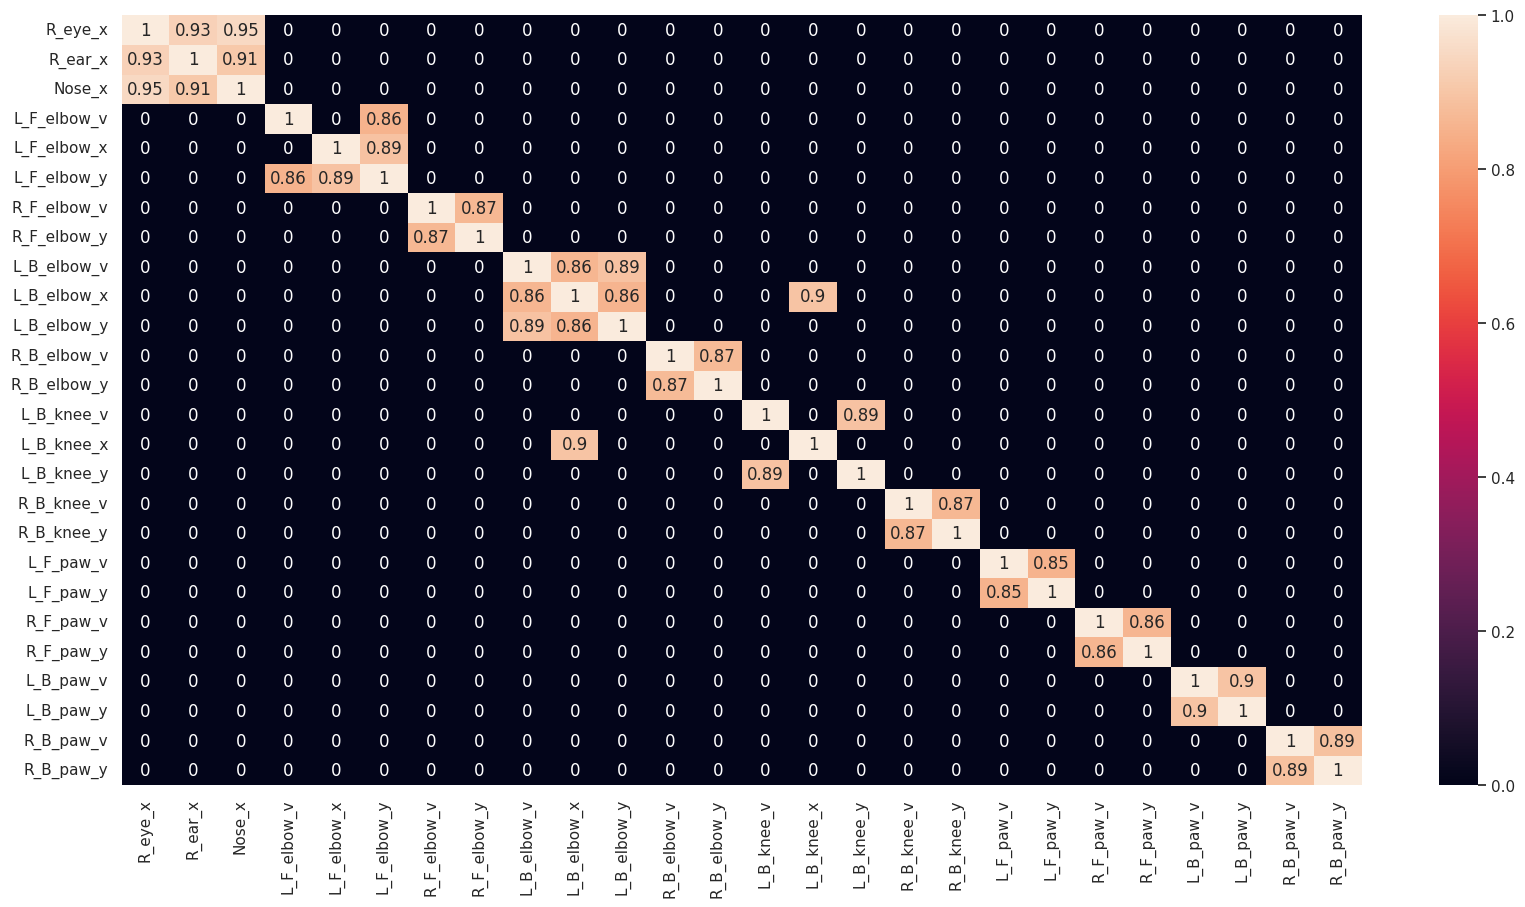

In [ ]:
mat_corr = x_train.corr()
mat_corr = mat_corr[np.abs(mat_corr) > 0.85]
mat_corr.fillna(0, inplace=True)

col_drop = mat_corr.sum()[mat_corr.sum() == 1].index
mat_corr.drop(col_drop, axis=1, inplace=True)
mat_corr.drop(col_drop, axis=0, inplace=True)

plt.figure(figsize=(20, 10))
sns.heatmap(mat_corr, annot=True);

In [ ]:
table_corr = mat_corr.unstack().sort_values()
col_drop = table_corr[(table_corr < 1) & (table_corr > 0.85)].sort_values().index
col_drop = [col_drop[i][1] for i in range(0, col_drop.shape[0], 2)]
col_drop_X = np.unique(col_drop)
col_drop_X

array(['L_B_elbow_v', 'L_B_elbow_x', 'L_B_elbow_y', 'L_B_knee_v',
       'L_B_knee_x', 'L_B_paw_y', 'L_F_elbow_x', 'L_F_elbow_y',
       'L_F_paw_y', 'R_B_elbow_v', 'R_B_knee_v', 'R_B_paw_v',
       'R_F_elbow_y', 'R_F_paw_v', 'R_ear_x', 'R_eye_x'], dtype='<U11')

In [ ]:
x_train.drop(col_drop_X, axis=1, inplace=True)

In [ ]:
x_train.head()

,id,cat,cow,dog,horse,sheep,bounds_x,bounds_y,bounds_width,bounds_height,...,R_B_knee_x,R_B_knee_y,L_F_paw_v,L_F_paw_x,R_F_paw_x,R_F_paw_y,L_B_paw_v,L_B_paw_x,R_B_paw_x,R_B_paw_y
0,265,0,1,0,0,0,37,16,240,170,...,49,127,1,208,161,168,1,94,55,177
1,676,0,0,0,1,0,43,8,208,236,...,113,185,1,167,193,209,1,77,115,233
2,441,0,0,1,0,0,65,0,234,222,...,0,0,0,0,0,0,0,0,0,0
3,328,0,1,0,0,0,15,8,272,178,...,40,139,1,169,190,172,1,52,35,178
4,102,1,0,0,0,0,2,1,148,146,...,24,107,1,129,68,131,1,3,0,0


In [ ]:
label_action = [0, 1, 2, 3, 4, 5]
y_train['action'] = y_train.agg(lambda x : label_action[np.argmax(x[1:])], axis=1) 
col_drop = ['nothing', 'stand',	'sit', 'lie', 'go', 'run']
y_train.drop(col_drop, axis=1, inplace=True)

In [ ]:
y_train.head()

,id,action
0,265,4
1,676,4
2,441,0
3,328,1
4,102,3


<Axes: xlabel='action', ylabel='count'>

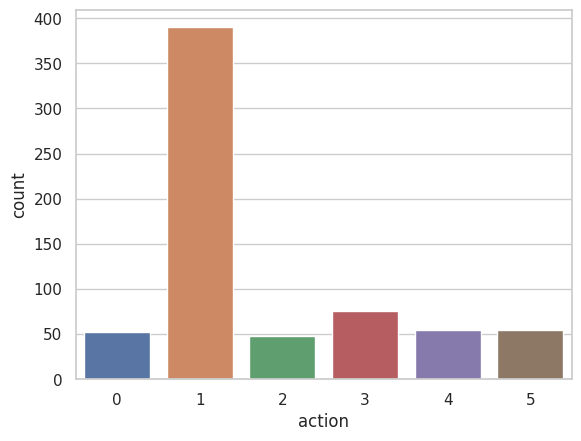

In [ ]:
sns.countplot(x = y_train.iloc[:, 1])

In [ ]:
label_animal = ['cat', 'cow', 'dog', 'horse', 'sheep']
x_train['cat'] = x_train.agg(lambda x : label_animal[np.argmax(x[1:6])], axis=1) 
x_train.rename(columns={'cat': 'animal'}, inplace=True)
x_train.drop(label_animal[1:], axis=1, inplace=True)

# **CatBoost**

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 2.4 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier, Pool, CatBoost
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [ ]:
X_tr, X_val, y_tr, y_val = train_test_split(x_train.iloc[:, 1:],
                                            y_train.iloc[:, 1],
                                            test_size=0.15,
                                            stratify=y_train.iloc[:, 1],
                                            random_state=42)

In [ ]:
model = CatBoostClassifier(loss_function='MultiClass', eval_metric = 'TotalF1')

grid = {'learning_rate': [0.03, 0.1],
        'depth': [2],
        'l2_leaf_reg': [1, 3]}

grid_res = model.grid_search(grid, X=x_train.iloc[:, 1:], y=y_train.iloc[:, 1], verbose=100)

Выходные данные были обрезаны до нескольких последних строк (5000).
25:	learn: 0.4231612	test: 0.4180869	best: 0.4180869 (0)	total: 90.3ms	remaining: 3.38s
26:	learn: 0.4231612	test: 0.4180869	best: 0.4180869 (0)	total: 93.7ms	remaining: 3.38s
27:	learn: 0.4231612	test: 0.4180869	best: 0.4180869 (0)	total: 101ms	remaining: 3.49s
28:	learn: 0.4231612	test: 0.4180869	best: 0.4180869 (0)	total: 106ms	remaining: 3.55s
29:	learn: 0.4231612	test: 0.4180869	best: 0.4180869 (0)	total: 111ms	remaining: 3.6s
30:	learn: 0.4231612	test: 0.4180869	best: 0.4180869 (0)	total: 117ms	remaining: 3.64s
31:	learn: 0.4231612	test: 0.4180869	best: 0.4180869 (0)	total: 122ms	remaining: 3.68s
32:	learn: 0.4231612	test: 0.4180869	best: 0.4180869 (0)	total: 126ms	remaining: 3.69s
33:	learn: 0.4231612	test: 0.4180869	best: 0.4180869 (0)	total: 129ms	remaining: 3.66s
34:	learn: 0.4301860	test: 0.4472412	best: 0.4472412 (34)	total: 132ms	remaining: 3.64s
35:	learn: 0.4231612	test: 0.4180869	best: 0.4472412 (34)	to

In [ ]:
model = CatBoostClassifier(**{'loss_function': 'MultiClass',
                            'eval_metric': 'TotalF1'})

model.fit(X_tr, y_tr, cat_features=['animal'])

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.076918
0:	learn: 1.7106493	total: 188ms	remaining: 3m 7s
1:	learn: 1.6365510	total: 307ms	remaining: 2m 33s
2:	learn: 1.5631669	total: 464ms	remaining: 2m 34s
3:	learn: 1.5020790	total: 590ms	remaining: 2m 27s
4:	learn: 1.4541630	total: 739ms	remaining: 2m 27s
5:	learn: 1.4097118	total: 842ms	remaining: 2m 19s
6:	learn: 1.3744423	total: 998ms	remaining: 2m 21s
7:	learn: 1.3377558	total: 1.1s	remaining: 2m 16s
8:	learn: 1.3058107	total: 1.25s	remaining: 2m 17s
9:	learn: 1.2753919	total: 1.37s	remaining: 2m 15s
10:	learn: 1.2487783	total: 1.52s	remaining: 2m 17s
11:	learn: 1.2192602	total: 1.65s	remaining: 2m 15s
12:	learn: 1.1952325	total: 1.9s	remaining: 2m 24s
13:	learn: 1.1747046	total: 2.08s	remaining: 2m 26s
14:	learn: 1.1538053	total: 2.23s	remaining: 2m 26s
15:	learn: 1.1340262	total: 2.45s	remaining: 2m 30s
16:	learn: 1.1147544	total: 2.55s	remaining: 2m 27s
17:	learn: 1.0922692	total: 2.68s	remaining: 2m 26s
18:	learn: 1.0754406	total: 2.74s	remaining: 2m

In [ ]:
y_pred = model.predict(X_val)
# preds_proba = model.predict_proba(X_val)

In [ ]:
f1_score(y_val, y_pred, average='micro')

0.9509803921568627

In [ ]:
model.fit(x_train.iloc[:, 1:], y_train.iloc[:, 1], cat_features=['animal'])

Learning rate set to 0.077562
0:	learn: 0.9479112	total: 13.5ms	remaining: 13.5s
1:	learn: 0.9558084	total: 28.4ms	remaining: 14.2s
2:	learn: 0.9522365	total: 41.8ms	remaining: 13.9s
3:	learn: 0.9517916	total: 54.7ms	remaining: 13.6s
4:	learn: 0.9500481	total: 67.5ms	remaining: 13.4s
5:	learn: 0.9350567	total: 80.8ms	remaining: 13.4s
6:	learn: 0.9482848	total: 93.7ms	remaining: 13.3s
7:	learn: 0.9482848	total: 106ms	remaining: 13.2s
8:	learn: 0.9530755	total: 121ms	remaining: 13.3s
9:	learn: 0.9465011	total: 133ms	remaining: 13.2s
10:	learn: 0.9500481	total: 146ms	remaining: 13.2s
11:	learn: 0.9477687	total: 161ms	remaining: 13.3s
12:	learn: 0.9482848	total: 177ms	remaining: 13.4s
13:	learn: 0.9472287	total: 189ms	remaining: 13.3s
14:	learn: 0.9534371	total: 205ms	remaining: 13.5s
15:	learn: 0.9556723	total: 220ms	remaining: 13.5s
16:	learn: 0.9574110	total: 233ms	remaining: 13.5s
17:	learn: 0.9578176	total: 246ms	remaining: 13.4s
18:	learn: 0.9595139	total: 259ms	remaining: 13.4s
19:	

# **XGBoost**

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from xgboost import XGBClassifier

In [ ]:
model = XGBClassifier(eval_metric='mlogloss')

In [ ]:
X_tr, X_val, y_tr, y_val = train_test_split(x_train.iloc[:, 1:],
                                            y_train.iloc[:, 1],
                                            test_size=0.15,
                                            stratify=y_train.iloc[:, 1],
                                            random_state=42)

In [ ]:
model.fit(x_train.iloc[:, 1:], y_train.iloc[:, 1])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [ ]:
y_pred = model.predict(X_tr)

# **Тестовые данные**

In [ ]:
label_animal = ['cat', 'cow', 'dog', 'horse', 'sheep']
x_test['cat'] = x_test.agg(lambda x : label_animal[np.argmax(x[1:6])], axis=1) 
x_test.rename(columns={'cat': 'animal'}, inplace=True)
x_test.drop(label_animal[1:], axis=1, inplace=True)

In [ ]:
x_test.drop(col_drop_X, axis=1, inplace=True)

In [ ]:
X_test = x_test.iloc[:, 1:]

In [ ]:
y_test = model.predict(X_test)

In [ ]:
ans = pd.DataFrame()
ans['id'] = x_test['id']
ans['label'] = y_test

In [ ]:
ans

,id,label
0,582,4
1,42,5
2,148,1
3,737,4
4,213,0
...,...,...
286,902,1
287,284,1
288,276,1
289,889,1


In [ ]:
ans.to_csv('/content/gdrive/MyDrive/ML_misis_4sem/hw_05/ans.csv', index=False)